In [69]:
# import packages
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [70]:
calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')

In [71]:
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [72]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [73]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [74]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
listing_id    1308890 non-null int64
date          1308890 non-null object
available     1308890 non-null object
price         643037 non-null object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [75]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

In [76]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
listing_id       68275 non-null int64
id               68275 non-null int64
date             68275 non-null object
reviewer_id      68275 non-null int64
reviewer_name    68275 non-null object
comments         68222 non-null object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


In [77]:
# Cleaning calendar data

# str to datetime
to_datetime = lambda x: datetime.datetime.strptime(str(x),'%Y-%m-%d')

# remove sign
def remove_sign(x,sign):
    if type(x) is str:
        x = float(x.replace(sign,'').replace(',',''))
    return x

# change [date] column datatype to datetime
calendar.date = calendar.date.apply(to_datetime)

# remove '$' sign from price column
calendar.price = calendar.price.apply(remove_sign,sign='$')
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
listing_id    1308890 non-null int64
date          1308890 non-null datetime64[ns]
available     1308890 non-null object
price         643037 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 39.9+ MB


In [78]:
# Cleaning listing data

listings.host_since = listings.host_since.apply(to_datetime)
listings.price = listings.price.apply(remove_sign,sign='$')
listings.host_response_rate = listings.host_response_rate.apply(remove_sign,sign='%')
listings.host_acceptance_rate = listings.host_acceptance_rate.apply(remove_sign,sign='%')
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

In [79]:
reviews.date = reviews.date.apply(to_datetime)
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
listing_id       68275 non-null int64
id               68275 non-null int64
date             68275 non-null datetime64[ns]
reviewer_id      68275 non-null int64
reviewer_name    68275 non-null object
comments         68222 non-null object
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 3.1+ MB


In [80]:
# host since house count
cumulative_host = listings.groupby('host_since').count()[['id']]
# change column name
cumulative_host = cumulative_host.rename({"id":"house_num"},axis='columns')

# get cumulative house numbers
cumulative_host['house_num'] = cumulative_host.house_num.cumsum()
cumulative_host.head()

,house_num
host_since,
2008-11-11,2
2008-12-03,3
2009-02-16,4
2009-02-17,5
2009-02-19,11


In [81]:
listings['year_month'] = listings.host_since.dt.to_period('M')

def cumulative_listing_for_cat(colname,listings=listings):
    '''
    This function is used to get the cummulative listing on different categorys over year_month
    
    INPUT:
    colname - str, the categorical column you want to cummulate
    bs_listing - data.frame,bs listing data
    
    OUTPUT:
    df - a new dataframe that has the following columns:
            1. year_month
            2. colname,indicate category
            3. cum_listings
    '''
    col_listnum = listings.groupby(['year_month',colname]).count()[['id']]
    col_listnum.reset_index(inplace=True)
    
    # calculate cumulative listing for each category
    col_listnum = col_listnum.sort_values(by=[colname,'year_month'])
    col_listnum['cumulative_num'] = col_listnum.groupby(by=[colname])['id'].apply(lambda x: x.cumsum())
    
    # drop unneeded column
    col_listnum.drop(['id'],inplace=True,axis=1)
    
    # long to wide
    # notice that for each category there are some year_month without any record
    # need to flattern the data make sure every neighborhood has all the year_month record.
    # fill na with the last non na value
    col_listnum_wide = col_listnum.pivot('year_month', colname)
    col_listnum_wide = col_listnum_wide.fillna(method='ffill')
    col_listnum_wide = col_listnum_wide.fillna(0)
    
    # rename columns prepare for wide to long
    col_listnum_wide.rename(columns=lambda x: 'col_'+x, inplace=True)
    
    # reset index
    col_listnum_wide.reset_index(inplace=True)
    col_listnum_wide['year_month'] = col_listnum_wide['year_month']
    
    # change this wide data to long again for drawing figures
    col_listnum_wide_long = col_listnum_wide.melt('year_month', var_name='cols',  value_name='vals')
    col_listnum_wide_long = col_listnum_wide_long.rename(columns={"cols": colname, "vals": "cum_listings"})
    
    return col_listnum_wide_long


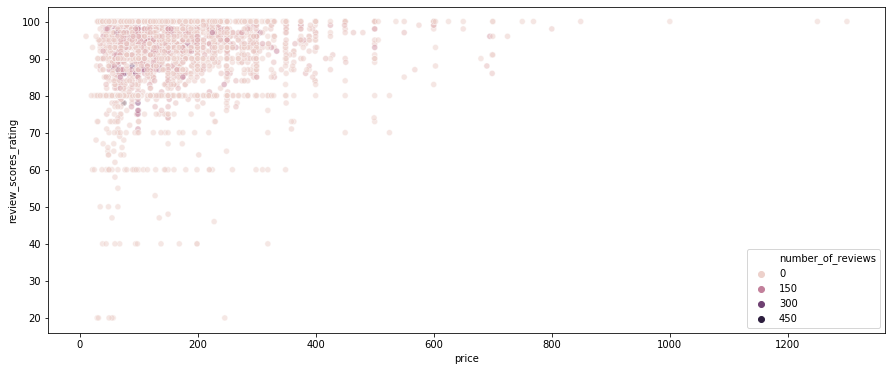

In [82]:
# Relation between rating and pricing

def price_level(x,low_bar=85,high_bar=220):
    if x<=low_bar:
        x='Low_Price'
    elif x>=high_bar:
        x='High_Price'
    else:
        x='Medium_Price'
    return x
listings['price_level'] = listings.price.apply(price_level)

bs_price_rate = listings[["id","price","review_scores_rating","number_of_reviews","price_level"]].dropna()

f, ax = plt.subplots(figsize=(15, 6))
sns.scatterplot(x='price',y='review_scores_rating',hue='number_of_reviews',alpha=0.5,data=bs_price_rate)


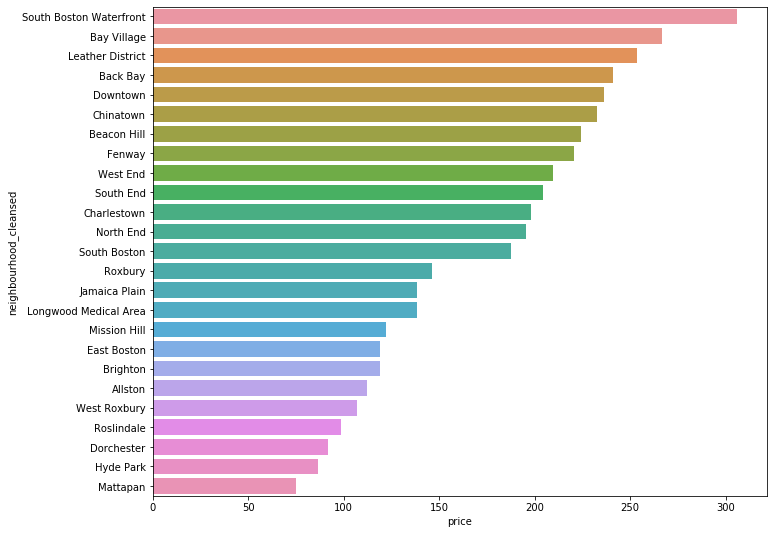

In [83]:
# Influences on the rating and pricing
listings_price = listings[listings.price.notnull()]

def plot_price_by_cat(colname,listings=listings,fig_row_size=11,fig_col_size=9):
    price_col = listings_price.groupby(colname).mean()[['price']]
    price_col.reset_index(inplace=True)
    f, ax = plt.subplots(figsize=(fig_row_size, fig_col_size))
    sns.barplot(y=colname,x='price',data=price_col.sort_values(by='price', ascending=False))

neighbor_cumulative = cumulative_listing_for_cat('neighbourhood_cleansed',listings=listings)

# price and neighborhood
plot_price_by_cat('neighbourhood_cleansed',listings=listings_price)


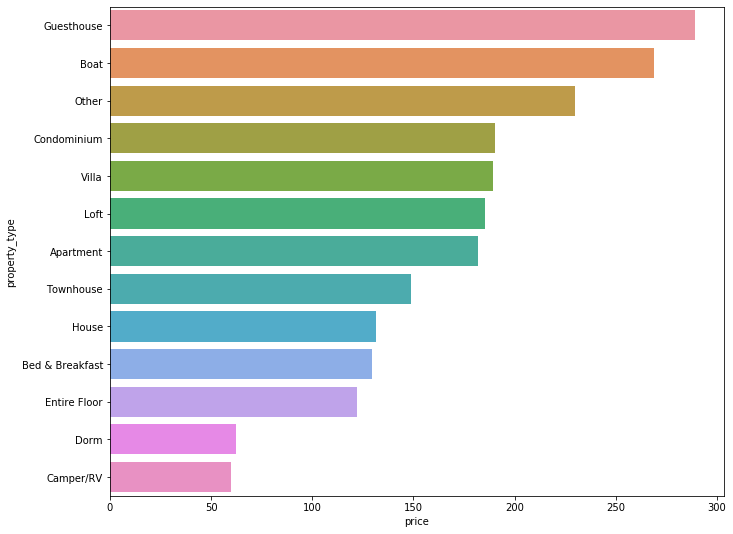

In [84]:
plot_price_by_cat('property_type',listings=listings_price)

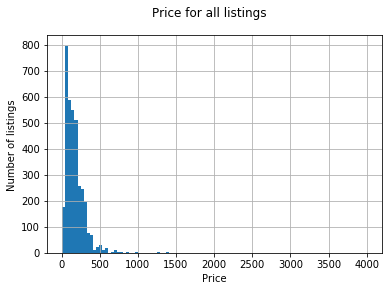

In [85]:
# Rooms' types and pricing

listings.price.hist(bins=100);
plt.suptitle("Price for all listings");   
plt.xlabel('Price');
plt.ylabel('Number of listings');

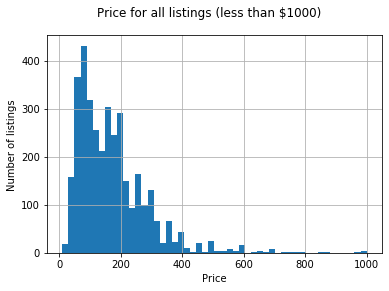

In [86]:
listings[listings['price'] <=1000].price.hist(bins=50);
plt.suptitle("Price for all listings (less than $1000)");   
plt.xlabel('Price');
plt.ylabel('Number of listings');

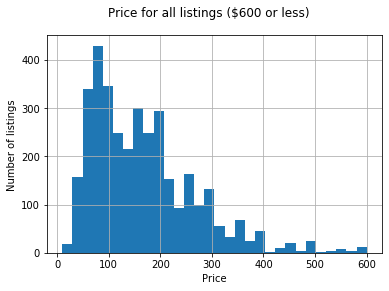

In [87]:
listings[listings['price'] <=600].price.hist(bins=30);
plt.suptitle("Price for all listings ($600 or less)");   
plt.xlabel('Price');
plt.ylabel('Number of listings');

In [88]:
room_types = list(set(listings['room_type']))
room_types

['Entire home/apt', 'Shared room', 'Private room']

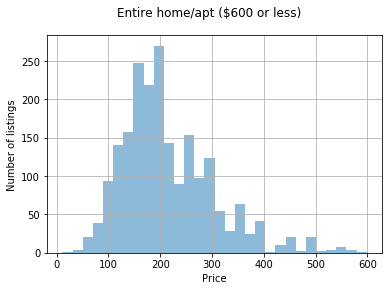

In [89]:
listings[(listings['price'] <600) & (listings['room_type'] == room_types[0])].price.hist(bins=30, alpha=0.5);                                                                                            
plt.suptitle("Entire home/apt ($600 or less)");   
plt.xlabel('Price');
plt.ylabel('Number of listings');

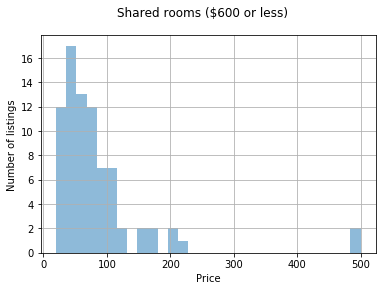

In [90]:
listings[(listings['price'] <600) & (listings['room_type'] == room_types[1])].price.hist(bins=30, alpha=0.5);                                                                                            
plt.suptitle("Shared rooms ($600 or less)");   
plt.xlabel('Price');
plt.ylabel('Number of listings');

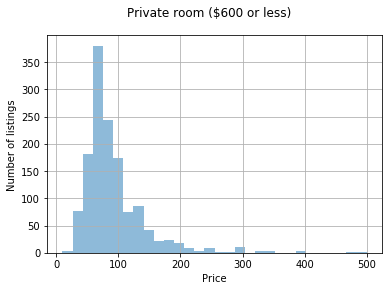

In [91]:
listings[(listings['price'] <600) & (listings['room_type'] == room_types[2])].price.hist(bins=30, alpha=0.5);                                                                                            
plt.suptitle("Private room ($600 or less)");   
plt.xlabel('Price');
plt.ylabel('Number of listings');